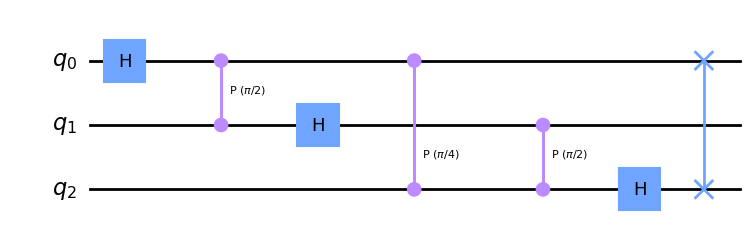

In [19]:
#QFT algorithm
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

def qft_circuit(n):
    qc = QuantumCircuit(n)
    for j in range(n):
        for k in range(j):
            qc.cp(np.pi/float(2**(j-k)), k, j)
        qc.h(j)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    return qc

# Example with 3 qubits
n = 3
qft_circ = qft_circuit(n)
qft_circ.draw(output='mpl')


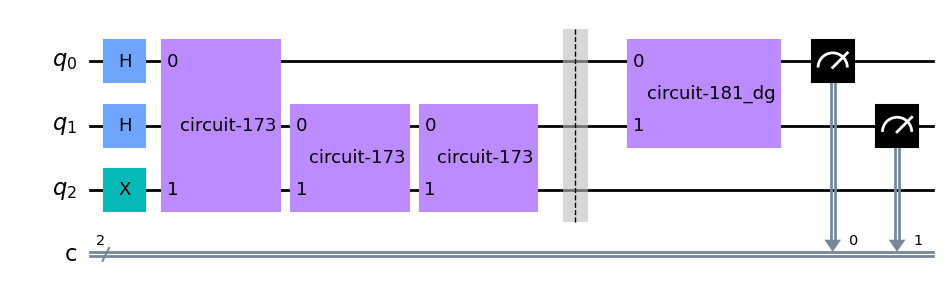

In [20]:
#QPE Algorithm
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

def qpe_circuit(n, unitary_gate):
    qc = QuantumCircuit(n+1, n)
    qc.h(range(n))
    qc.x(n)
    for qubit in range(n):
        repetitions = 2**qubit
        for _ in range(repetitions):
            qc.append(unitary_gate, [qubit] + list(range(n, n+1)))
    qc.barrier()
    qc.append(qft_circuit(n).to_gate().inverse(), range(n))
    qc.measure(range(n), range(n))
    return qc

# Example with 2 qubits and controlled-Z gate as the unitary operator
n = 2
cu_z = QuantumCircuit(2)
cu_z.cz(0, 1)
qpe_circ = qpe_circuit(n, cu_z)
qpe_circ.draw(output='mpl')
